In [41]:
# importing libraries
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

style.use("ggplot")

Energy = pd.read_excel("/Users/HP/Downloads/ENB2012_data.xlsx")

In [43]:
# brief description of data
print(Energy.head(10))
Energy.info()
Energy.describe()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
5  0.90  563.5  318.5  122.50  7.0   3  0.0   0  21.46  25.38
6  0.90  563.5  318.5  122.50  7.0   4  0.0   0  20.71  25.16
7  0.90  563.5  318.5  122.50  7.0   5  0.0   0  19.68  29.60
8  0.86  588.0  294.0  147.00  7.0   2  0.0   0  19.50  27.30
9  0.86  588.0  294.0  147.00  7.0   3  0.0   0  19.95  21.97
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
X7  1.283986e-17  1.318356e-16 -7.969726e-19 -1.381805e-16  1.861418e-18   
X8  1.764620e-17 -3.558613e-16  0.000000e+00 -1.079129e-16  0.000000e+00   
Y1  6.222719e-01 -6.581199e-01  4.556714e-01 -8.618281e-01  8.894305e-01   

          X6            X7            X8        Y1  
X1  0.000000  1.283986e-17  1.764620e-17  0.622272  
X2  0.000000  1.318356e-16 -3.558613e-16 -0.658120  
X3  0.000000 -7.969726e-19  0.000000e+00  0.455671  
X4  0.000000 -1.381805e-16 

<IPython.core.display.Javascript object>


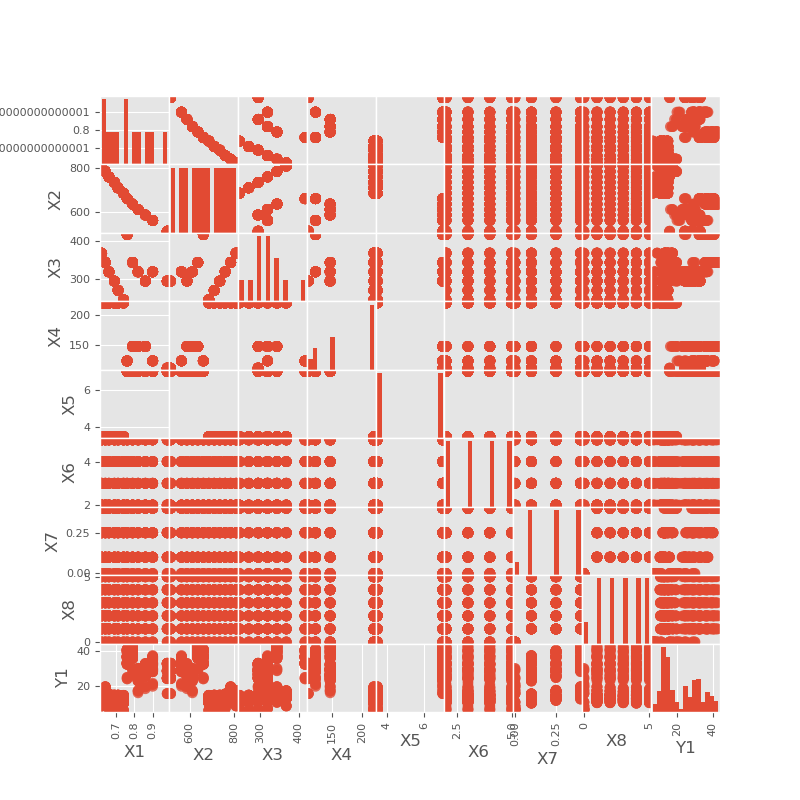

<IPython.core.display.Javascript object>


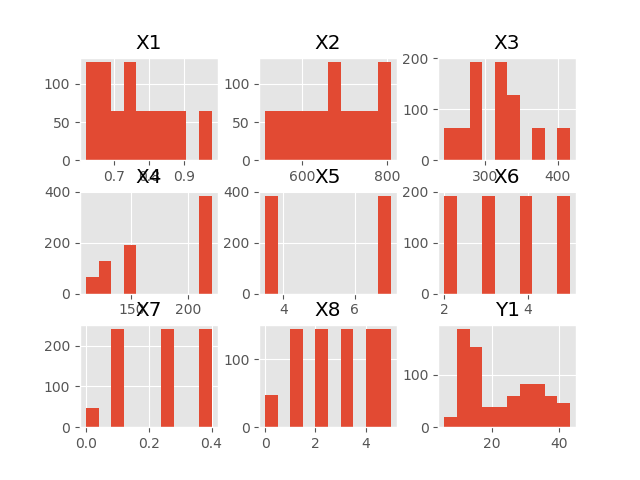

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EB5D4EDD8>,
      dtype=object)

In [45]:
# visualising heat load features
heat_load = Energy[['X1','X2','X3','X4','X5','X6','X7','X8','Y1']]
print(heat_load.corr())
heat_load_corr = scatter_matrix(Heat_load, figsize=(8, 8), marker='o', 
                                hist_kwds={'bins': 15}, s=60, alpha=.8)
heat_load.hist()        

              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
X7  1.283986e-17  1.318356e-16 -7.969726e-19 -1.381805e-16  1.861418e-18   
X8  1.764620e-17 -3.558613e-16  0.000000e+00 -1.079129e-16  0.000000e+00   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

         X6            X7            X8        Y2  
X1  0.00000  1.283986e-17  1.764620e-17  0.634339  
X2  0.00000  1.318356e-16 -3.558613e-16 -0.672999  
X3  0.00000 -7.969726e-19  0.000000e+00  0.427117  
X4  0.00000 -1.381805e-16 -1.07

<IPython.core.display.Javascript object>


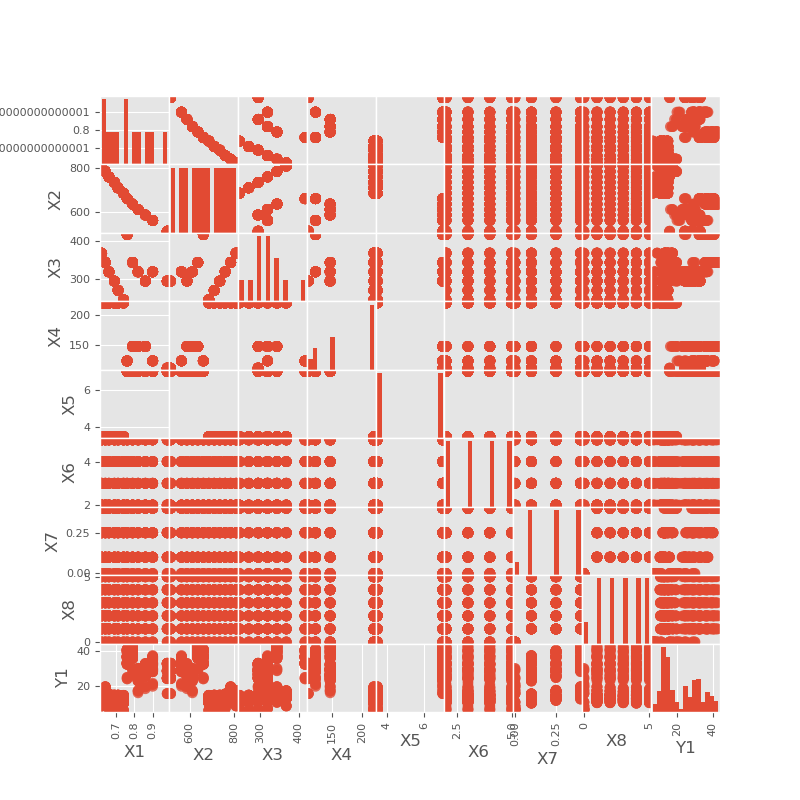

<IPython.core.display.Javascript object>


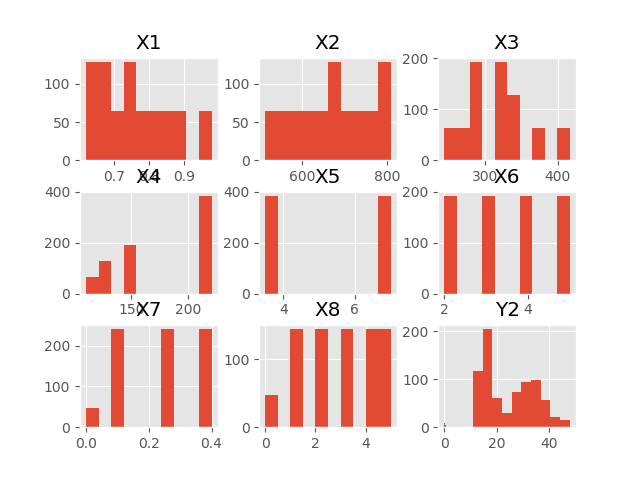

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EB1843C88>,
      dtype=object)

In [46]:
# visualising cool load features
cool_load = Energy[['X1','X2','X3','X4','X5','X6','X7','X8','Y2']]
print(cool_load.corr())
cool_load_corr = scatter_matrix(Heat_load, figsize=(8, 8), marker='o', 
                              hist_kwds={'bins': 15}, s=60, alpha=.8)
cool_load.hist() 

In [49]:
# array of heat load features and labels
X = np.array(heat_load.drop(['Y1'],1))
y = np.array(heat_load[['Y1']])

desc = 'Records for Heat load trained on Linear Regression model'

for target in range(2):
   
    print (desc)
    
    #splitting features into train and test sets
    X_train, X_test, y_train,  y_test = train_test_split (X, y,
                                                          test_size=0.2, random_state=42)

    # applying polynomial features
    poly = PolynomialFeatures() 
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)
    
    # feature scaling 
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
   
    # model training
    model = LinearRegression()
    
    clf = model 
    clf.fit(X_train, y_train)
    
    # cross validation results for selected model
    kfold = KFold(n_splits=10, random_state=7)
    scores = cross_val_score(clf, X_train, y_train, cv=kfold)
    msg1 = "Scores:{}\n Mean:{}\n Standard deviation:{}".format(scores, scores.mean(), scores.std())
    print(msg1)
    
    # train and test results
    train_results = clf.score(X_train, y_train)
    test_results = clf.score(X_test,  y_test)
    msg2 = "Train Results:{}, Test Results:{}".format(train_results, test_results)
    print(msg2)
    
    # array of cool load features and labels
    x = np.array(cool_load.drop(['Y2'],1))
    Y = np.array(cool_load[['Y2']])
    
    desc = 'Records for Cool load trained on Linear Regression model'     

Records for Heat load trained on Linear Regression model
Scores:[0.99378425 0.99395057 0.99059593 0.99557603 0.99512081 0.99441605
 0.99460111 0.99532086 0.99485119 0.99213789]
 Mean:0.9940354684435924
 Standard deviation:0.001477676120425913
Train Results:0.9948859555106968, Test Results:0.9933365326220053
Records for Cool load trained on Linear Regression model
Scores:[0.99378425 0.99395057 0.99059593 0.99558898 0.99512081 0.99441605
 0.99460111 0.99532086 0.99485119 0.99213789]
 Mean:0.9940367625531813
 Standard deviation:0.0014790297870448483
Train Results:0.9948859555106968, Test Results:0.9933365326220053
